In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("setup complete")

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


setup complete


In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')
data.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
264305,No,26.57,No,No,No,0.0,1.0,No,Female,50-54,Hispanic,No,Yes,Good,6.0,No,No,No
172916,Yes,23.69,Yes,No,Yes,3.0,0.0,Yes,Male,65-69,Black,No,Yes,Poor,5.0,No,Yes,No
115145,No,31.62,Yes,No,No,0.0,21.0,No,Female,55-59,White,No,Yes,Very good,6.0,No,No,No
122564,No,47.83,Yes,No,No,4.0,30.0,No,Female,40-44,Other,No,Yes,Very good,8.0,Yes,No,No
107764,No,26.61,No,No,No,0.0,0.0,Yes,Male,80 or older,White,No,Yes,Good,7.0,No,No,No
313396,No,20.78,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,7.0,No,No,No
206225,No,31.62,Yes,No,No,0.0,0.0,No,Female,55-59,Black,No,Yes,Excellent,12.0,No,No,No
314033,No,29.29,Yes,No,No,0.0,0.0,No,Male,40-44,Asian,No,No,Excellent,7.0,No,No,No
181590,No,25.75,No,No,No,0.0,7.0,No,Female,18-24,Hispanic,No,Yes,Excellent,10.0,No,No,No
209856,No,29.29,No,No,No,0.0,0.0,No,Male,60-64,American Indian/Alaskan Native,Yes,Yes,Good,10.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
data.shape

(319795, 18)

In [6]:
data.PhysicalActivity.value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

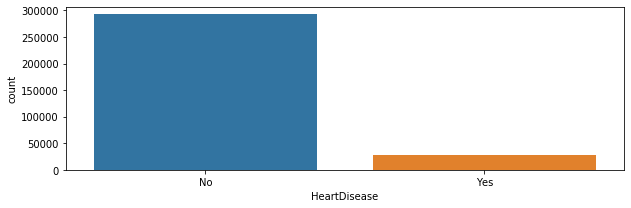

In [7]:
plt.figure(figsize=(10,3))
sns.countplot(data['HeartDisease'])

In [8]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

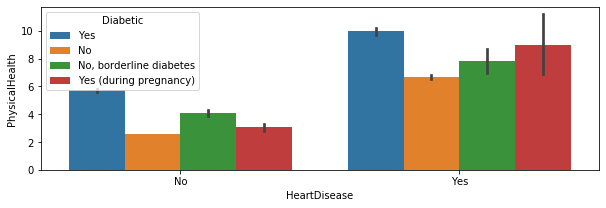

In [9]:
plt.figure(figsize=(10,3))
sns.barplot(data=data, x='HeartDisease', y='PhysicalHealth', hue="Diabetic")

In [10]:
data.Smoking.value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

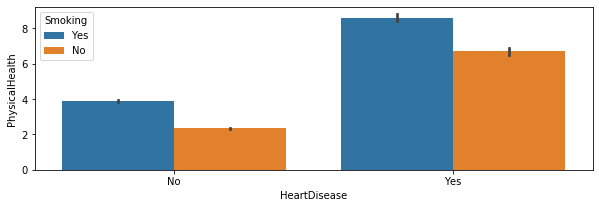

In [11]:
plt.figure(figsize=(10,3))
sns.barplot(data=data, x='HeartDisease', y='PhysicalHealth', hue="Smoking")

<function matplotlib.pyplot.show(*args, **kw)>

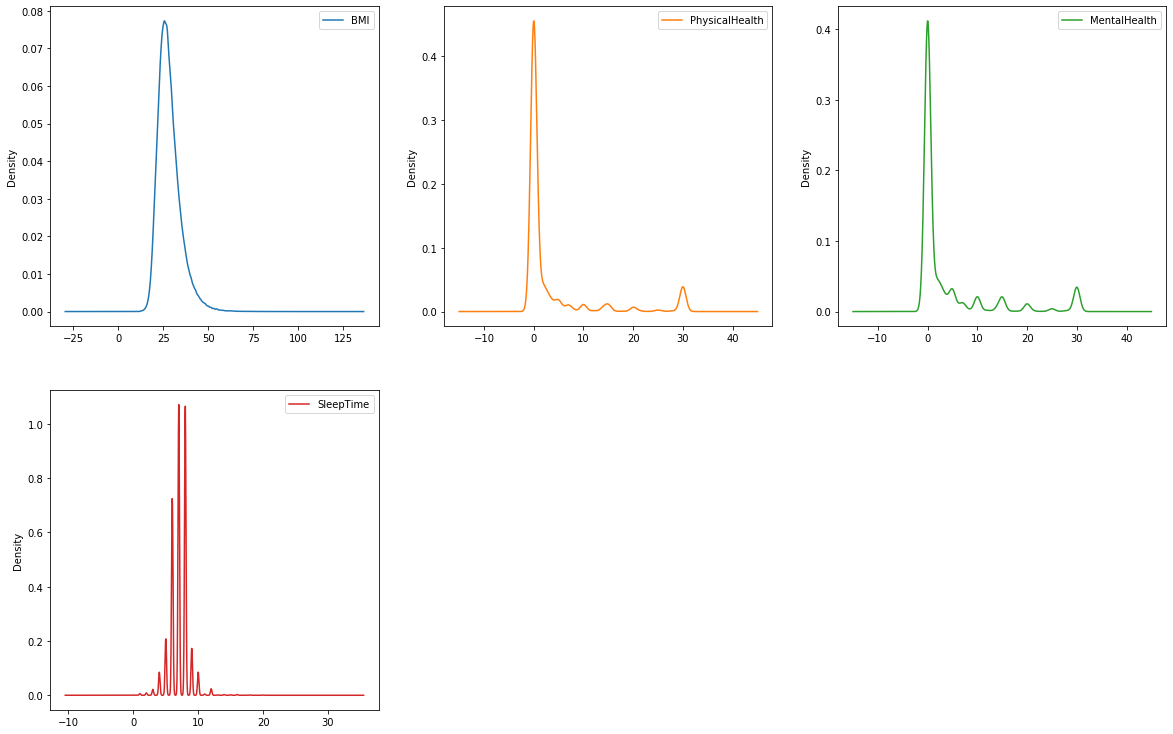

In [12]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show

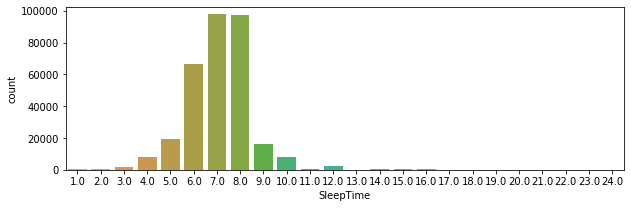

In [13]:
plt.figure(figsize=(10,3))
sns.countplot(data['SleepTime'])

In [14]:
data.SleepTime.value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [15]:
df = data.copy()

## Preprocessing

In [16]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'AgeCategory',
        'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

for i in cols:
    df[i] = data[[i]].apply(le.fit_transform)


In [18]:
df.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X =df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=.8, random_state=32)

In [20]:
y.sample(5)

11453     0
292512    0
87942     0
179135    1
213931    0
Name: HeartDisease, dtype: int32

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_train)
y = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=n

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
pred = model.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [24]:
# validation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9145077315155021

In [25]:
# save model
import pickle

ml = "saved_model.sav"

pickle.dump(model, open(ml, 'wb'))
